In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

db_train = pd.read_csv('database_mean_unknown_noNewVaraibles.csv')
db_train.describe()
del db_train['sessionNo']
del db_train['customerNo']
del db_train['address']

In [4]:
from sklearn.preprocessing import LabelEncoder
enc = []
enc.append(LabelEncoder())
enc.append(LabelEncoder())
enc.append(LabelEncoder())
fields = ['onlineStatus', 'availability', 'order']
for (field, e) in enumerate(enc):
    enc[field].fit(db_train[fields[field]])
    db_train[fields[field]] = enc[field].transform(db_train[fields[field]])
db_train

,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,...,bStep,onlineStatus,availability,maxVal,customerScore,accountLifetime,payments,age,lastOrder,order
0,6,5,39.887,1,59.99000,59.990000,59.990000,1,59.990000,59.990000,...,3.158804,2,2,600.000000,70.000000,21.000000,1.000000,43.000000,49.000000,1
1,6,5,94.469,0,72.11816,157.646205,1096.642791,0,86.444819,118.589753,...,3.158804,2,2,2266.582859,483.731568,128.169304,12.893535,44.921048,79.007675,1
2,6,5,341.613,11,9.99000,29.990000,109.950000,2,9.990000,29.990000,...,3.158804,2,2,1800.000000,475.000000,302.000000,12.000000,45.000000,11.000000,1
3,6,5,42.812,4,4.99000,4.990000,19.960000,1,4.990000,4.990000,...,1.000000,2,1,2266.582859,483.731568,128.169304,12.893535,44.921048,79.007675,0
4,6,5,2816.046,45,12.99000,179.950000,1093.720000,4,19.990000,27.850000,...,3.158804,2,2,800.000000,503.000000,18.000000,1.000000,46.000000,40.000000,1
5,6,5,0.000,3,99.99000,169.000000,398.980000,3,99.990000,169.000000,...,3.158804,0,3,2266.582859,483.731568,128.169304,12.893535,44.921048,79.007675,0
6,6,5,973.887,15,3.00000,40.000000,137.000000,3,3.000000,3.000000,...,3.158804,2,2,900.000000,575.000000,35.000000,10.000000,31.000000,10.000000,1
7,6,5,0.000,1,59.99000,59.990000,59.990000,1,59.990000,59.990000,...,3.158804,0,3,500.000000,430.000000,3.000000,10.000000,21.000000,57.000000,0
8,6,5,550.968,2,499.99000,499.990000,999.980000,1,499.990000,499.990000,...,5.000000,2,2,2266.582859,483.731568,128.169304,12.893535,44.921048,79.007675,1
9,6,5,1106.575,19,5.00000,24.990000,246.110000,2,12.000000,19.990000,...,3.158804,0,3,4000.000000,555.000000,55.000000,23.000000,51.000000,24.000000,0


In [15]:
KNN = KNeighborsClassifier(n_neighbors=5)
classifier = KNN.fit(db_train.values[:,:-1], db_train.values[:,-1])

In [36]:
db_class = pd.read_csv('database_class_mean_unknown_noClass.csv')
del db_class['sessionNo']
del db_class['customerNo']
del db_class['address']
db_class

,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,...,customerScore,accountLifetime,payments,age,lastOrder,rCount,bMinPriceVariance,bMaxPriceVariance,bMeanVariance,cMeanVariance
0,18,7,624.606,11,16.99000,39.990000,207.91000,5,16.990000,39.990000,...,489.000000,188.000000,5.000000,49.000000,65.000000,1,91.432099,91.432099,91.432099,91.432099
1,18,7,2804.705,16,34.99000,34.990000,174.95000,2,34.990000,34.990000,...,543.000000,43.000000,5.000000,29.000000,184.000000,1,0.000000,0.000000,0.000000,0.000000
2,18,7,7401.384,119,7.99000,59.950000,3263.57000,12,12.490000,39.950000,...,552.000000,17.000000,4.000000,37.000000,107.000000,1,5.845936,5.845936,5.845936,5.845936
3,18,7,2853.550,152,3.99000,239.990000,5642.50000,4,9.990000,14.990000,...,535.000000,226.000000,19.000000,49.000000,17.000000,1,0.000000,0.000000,0.000000,0.000000
4,18,7,48.145,2,29.99000,29.990000,59.98000,1,29.990000,29.990000,...,543.000000,39.000000,2.000000,53.000000,234.000000,0,0.000000,0.000000,0.000000,0.000000
5,18,7,3464.238,51,7.99000,39.990000,449.34000,3,7.990000,10.990000,...,513.000000,352.000000,9.000000,82.000000,28.000000,1,1.555556,1.555556,1.555556,1.555556
6,18,7,482.112,8,14.99000,19.990000,129.92000,2,14.990000,14.990000,...,476.621409,120.714286,9.496308,43.525107,89.313253,1,0.000000,0.000000,0.000000,0.000000
7,18,7,1844.763,40,8.99000,99.990000,648.74000,2,12.990000,14.990000,...,476.621409,120.714286,9.496308,43.525107,89.313253,1,1.000000,1.000000,1.000000,1.000000
8,18,7,68.599,4,59.99000,79.990000,299.96000,1,79.990000,79.990000,...,433.000000,73.000000,14.000000,65.000000,4.000000,0,0.000000,0.000000,0.000000,0.000000
9,18,7,5852.879,149,5.00000,39.990000,891.32000,5,7.990000,19.990000,...,476.621409,120.714286,9.496308,43.525107,89.313253,1,7.555556,7.555556,7.555556,7.555556


In [43]:
e = LabelEncoder()
e.fit(db_class['onlineStatus'])

LabelEncoder()

In [44]:
db_class['onlineStatus'] = e.transform(db_class['onlineStatus'])
db_class['onlineStatus']
e = LabelEncoder()
e.fit(db_class['availability'])
db_class['availability'] = e.transform(db_class['availability'])
db_class['availability']

0       2
1       2
2       2
3       3
4       2
5       3
6       2
7       3
8       3
9       2
10      5
11      2
12      2
13      3
14      2
15      3
16      2
17      2
18      2
19      2
20      3
21      2
22      2
23      3
24      3
25      3
26      2
27      2
28      2
29      2
       ..
5081    3
5082    2
5083    3
5084    2
5085    2
5086    2
5087    2
5088    3
5089    3
5090    3
5091    2
5092    3
5093    3
5094    3
5095    2
5096    2
5097    2
5098    2
5099    3
5100    3
5101    3
5102    3
5103    3
5104    2
5105    2
5106    3
5107    2
5108    2
5109    2
5110    2
Name: availability, Length: 5111, dtype: int64

In [46]:
score = classifier.predict(db_class.values)

In [52]:
trueClass = pd.read_csv('realclass_t1.csv')

In [53]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(trueClass['prediction'], score)

In [55]:
fpr

array([0.        , 0.42390524, 1.        ])

In [56]:
tpr

array([0.        , 0.76043011, 1.        ])

In [57]:
thresholds

array([2., 1., 0.])

In [58]:
auc = metrics.auc(fpr, tpr)

In [59]:
auc

0.6682624335193632

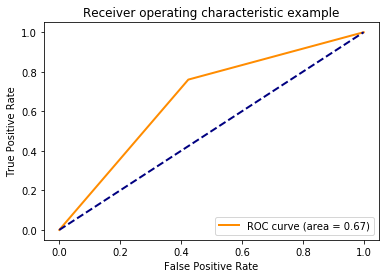

In [65]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [68]:
acc = metrics.accuracy_score(trueClass['prediction'], score)
acc

0.6599491293288985

In [8]:
from __future__ import print_function
import numpy as np
from sklearn import datasets, linear_model

from genetic_selection import GeneticSelectionCV



# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(db_train.values[:,:-1]), 20))

X = np.hstack((db_train.values[:,:-1], E))
y = db_train.values[:,-1]

estimator = linear_model.LogisticRegression()

selector = GeneticSelectionCV(estimator,
                              cv=5,
                              verbose=1,
                              scoring="accuracy",
                              n_population=50,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=40,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              tournament_size=3,
                              caching=True,
                              n_jobs=7)
selector = selector.fit(X, y)

print(selector.support_)

Selecting features with genetic algorithm.
gen	nevals	avg                      	std                    	min                      	max                      
0  	50    	[ 0.75846007 20.2       ]	[0.08245056 3.2       ]	[ 0.53406123 14.        ]	[ 0.90488059 28.        ]
1  	27    	[ 0.80480301 20.78      ]	[0.06825828 3.11313347]	[ 0.66056031 14.        ]	[ 0.90528051 27.        ]
2  	29    	[ 0.86793655 21.62      ]	[0.05196097 3.39935288]	[ 0.76043959 14.        ]	[ 0.90528051 28.        ]
3  	24    	[ 0.88828864 21.1       ]	[0.04758659 2.85131549]	[ 0.72112139 15.        ]	[ 0.90530057 26.        ]
4  	28    	[ 0.90041213 20.        ]	[0.02623147 2.56124969]	[ 0.71976129 15.        ]	[ 0.90546057 25.        ]
5  	29    	[ 0.90083451 18.5       ]	[0.02676567 2.40208243]	[ 0.71430122 13.        ]	[ 0.90556055 24.        ]
6  	27    	[ 0.90087657 18.32      ]	[0.03102006 2.28420665]	[ 0.68374134 13.        ]	[ 0.90568054 22.        ]
7  	29    	[ 0.90100457 18.06      ]	[0.03093042 2.36

In [ ]:
print(selector)